In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [4]:
X = df.iloc[:,0:3].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [7]:
# Residual
y_pred = model.predict(X_test)
residual = y_test - y_pred

## There are several assumptions related to Linear Regression. From them five are the most important assumptions important to the interview percpective are discussed below.

## 1. Linear Relationship
Linear relation between input and output

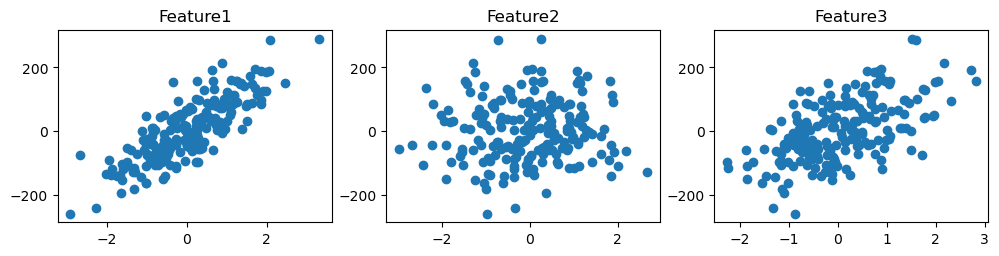

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title("Feature1")
ax2.scatter(df['feature2'], df['target'])
ax2.set_title("Feature2")
ax3.scatter(df['feature3'], df['target'])
ax3.set_title("Feature3")

plt.show()

## 2. Multicollinearity
There should be no multicollinearity between the features (If there are three input coloumns then they must be independent from each other)

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [10]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


<Axes: >

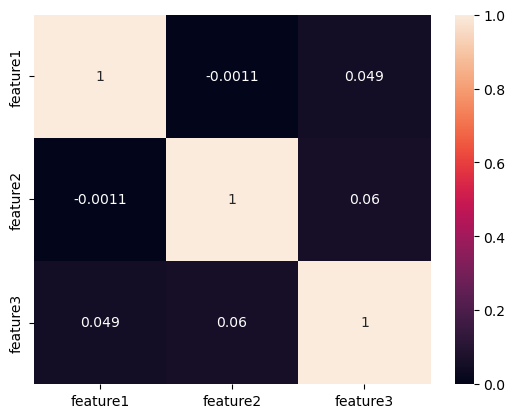

In [11]:
# Another Technique
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

## 3. Normality of Residual
If the residual is plotted, it should be normal

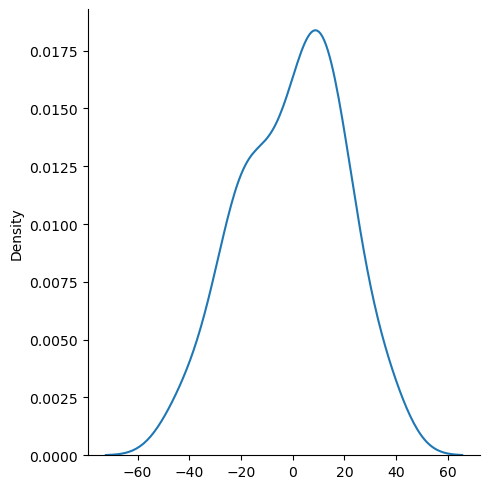

In [12]:
sns.displot(residual,kind='kde')

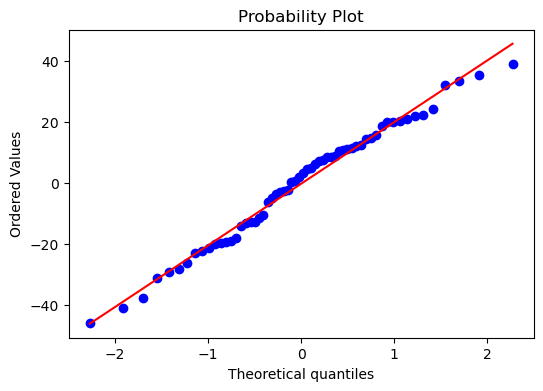

In [13]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

## 4. Homoscedasticity
Having the same scatter of the residual(error)

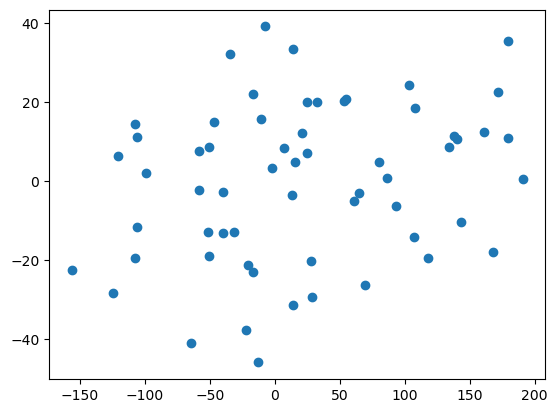

In [14]:
plt.scatter(y_pred,residual)

## 5. Autocorrelation of Residuals
No relation between the residuals

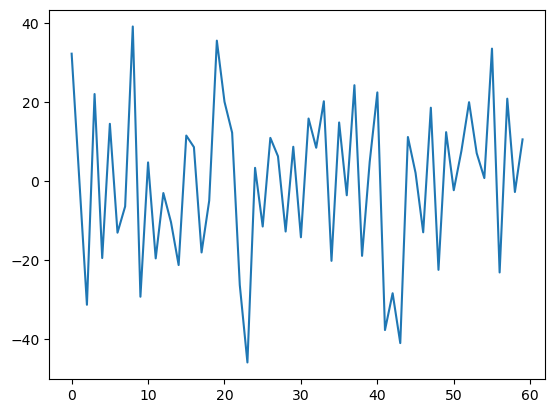

In [15]:
plt.plot(residual)